In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

%matplotlib inline

In [35]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

In [36]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
ts = df['Passengers']

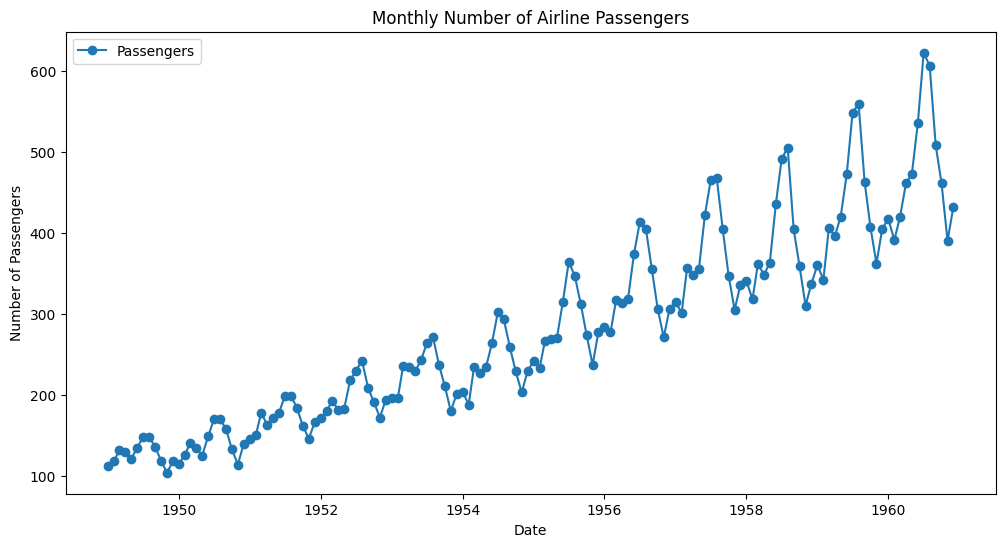

In [37]:
plt.figure(figsize=(12,6))
plt.plot(ts, marker='o', linestyle='-', label='Passengers')
plt.title('Monthly Number of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

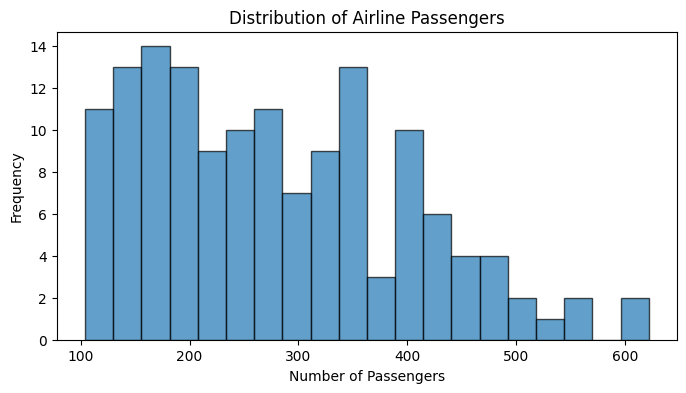

In [38]:
plt.figure(figsize=(8,4))
plt.hist(ts, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

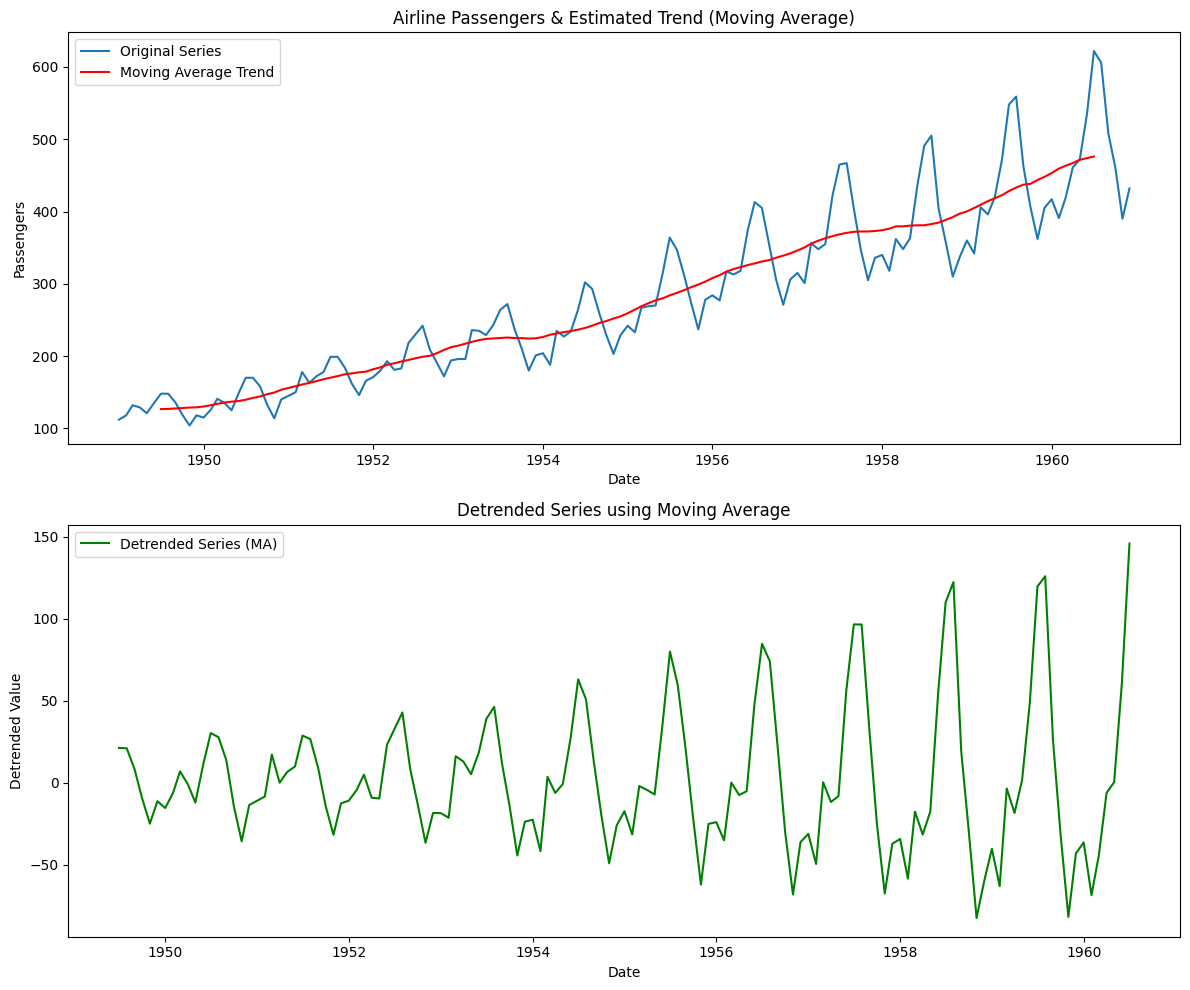

In [44]:
window_size = 12
trend_ma = ts.rolling(window=window_size, center=True).mean()

fig, axs = plt.subplots(2, 1, figsize=(12,10))

axs[0].plot(ts, label='Original Series')
axs[0].plot(trend_ma, color='red', label='Moving Average Trend')
axs[0].set_title('Airline Passengers & Estimated Trend (Moving Average)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passengers')
axs[0].legend()

detrended_ma = ts - trend_ma
axs[1].plot(detrended_ma, color='green', label='Detrended Series (MA)')
axs[1].set_title('Detrended Series using Moving Average')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Detrended Value')
axs[1].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


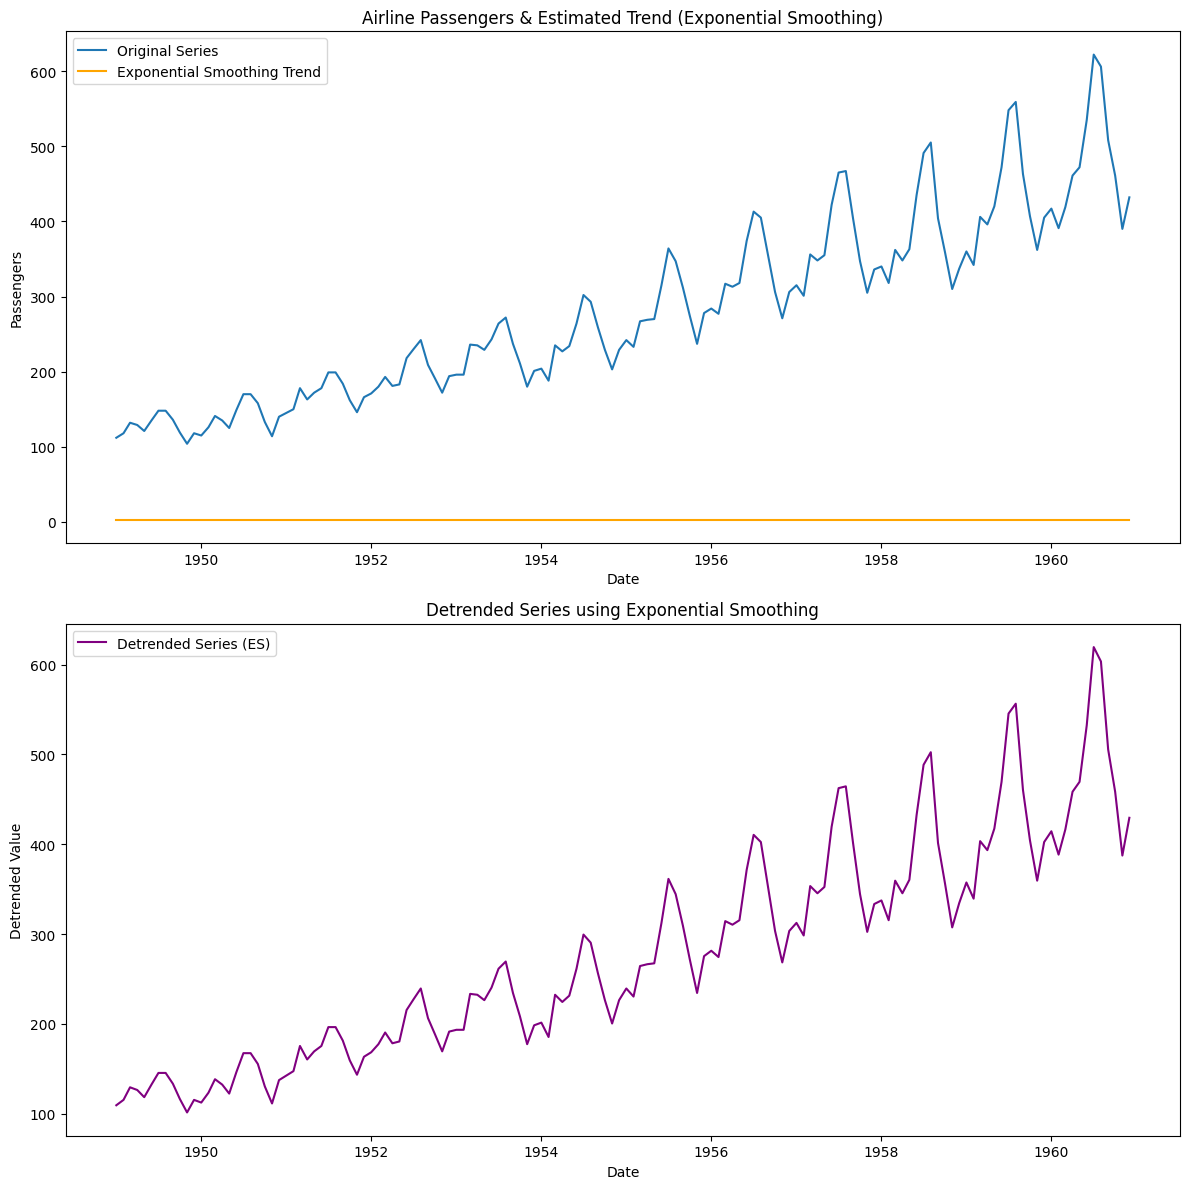

In [45]:
model_es = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
fit_es = model_es.fit(optimized=True)

trend_es = fit_es.trend

fig, axs = plt.subplots(2, 1, figsize=(12,12))

axs[0].plot(ts, label='Original Series')
axs[0].plot(trend_es, color='orange', label='Exponential Smoothing Trend')
axs[0].set_title('Airline Passengers & Estimated Trend (Exponential Smoothing)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passengers')
axs[0].legend()

detrended_es = ts - trend_es
axs[1].plot(detrended_es, color='purple', label='Detrended Series (ES)')
axs[1].set_title('Detrended Series using Exponential Smoothing')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Detrended Value')
axs[1].legend()

plt.tight_layout()
plt.show()
